## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [132]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


### Create count vectorizer


In [5]:
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [6]:
print(list(vect.vocabulary_.keys())[:50])

['most', 'is', 'the', 'story', 'of', 'single', 'father', 'who', 'takes', 'his', 'year', 'old', 'son', 'to', 'work', 'with', 'him', 'at', 'where', 'he', 'day', 'before', 'boy', 'meets', 'woman', 'train', 'drug', 'goes', 'into', 'room', 'and', 'tells', 'stay', 'ship', 'comes', 'though', 'it', 'arrive', 'an', 'later', 'happens', 'sees', 'this', 'tries', 'not', 'able', 'see', 'just', 'as', 'falls']


### Create y

In [7]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [8]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [9]:
y_genres.shape

(7895, 24)

In [10]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=0)

### Train multi-class multi-label model

In [11]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=0))

In [12]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=0))

In [13]:
y_pred_genres = clf.predict_proba(X_test)

In [14]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7815815458613827

Cargue de librerías

In [15]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [16]:
import nltk
nltk.download("all", quiet=True)

True

In [17]:
#Analisis de data
import matplotlib.pyplot as plt
from collections import Counter


from nltk.corpus import stopwords
from nltk import word_tokenize
import string #puntuacion
from nltk.stem import WordNetLemmatizer #Lematizador

#Vectorizar la data a numeros para que el modelo lo entienda
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import Word2Vec


#MODELOS
#Búsqueda hiperparametros
from sklearn.model_selection import ParameterGrid
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [18]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 4.5 MB/s eta 0:00:00


In [19]:
!python -m spacy download en_core_web_sm --quiet
import spacy
import wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Análisis de la Data

In [20]:
dataTraining.describe()

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


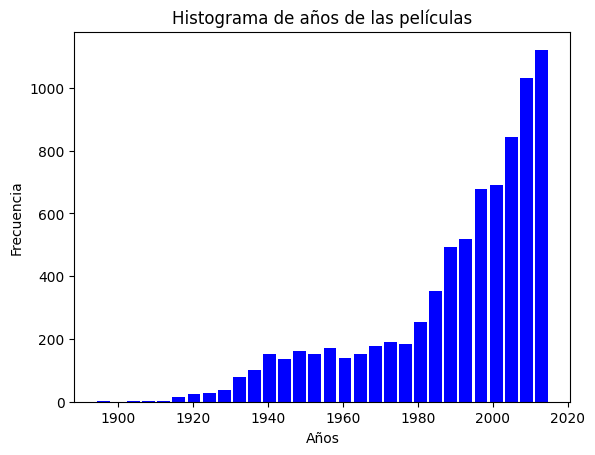

In [21]:
edades = dataTraining['year']

intervalos = 30 #intervalos

plt.hist(x=edades, bins=intervalos, color='blue', rwidth=0.85)
plt.title('Histograma de años de las películas')
plt.xlabel('Años')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

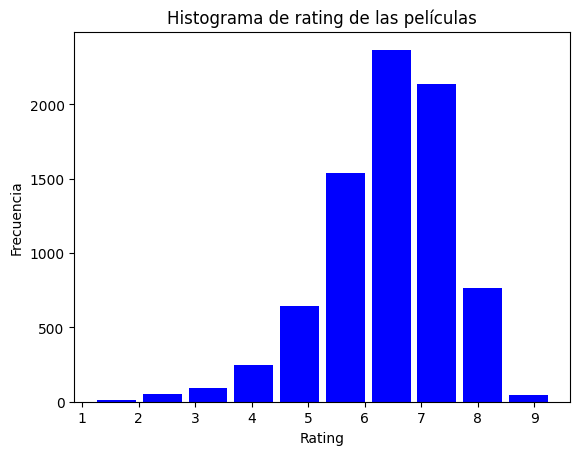

In [22]:
rating = dataTraining['rating']

intervalos = 10 #intervalos

plt.hist(x=rating, bins=intervalos, color='blue', rwidth=0.85)
plt.title('Histograma de rating de las películas')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
#plot.xticks(intervalos)

plt.show()

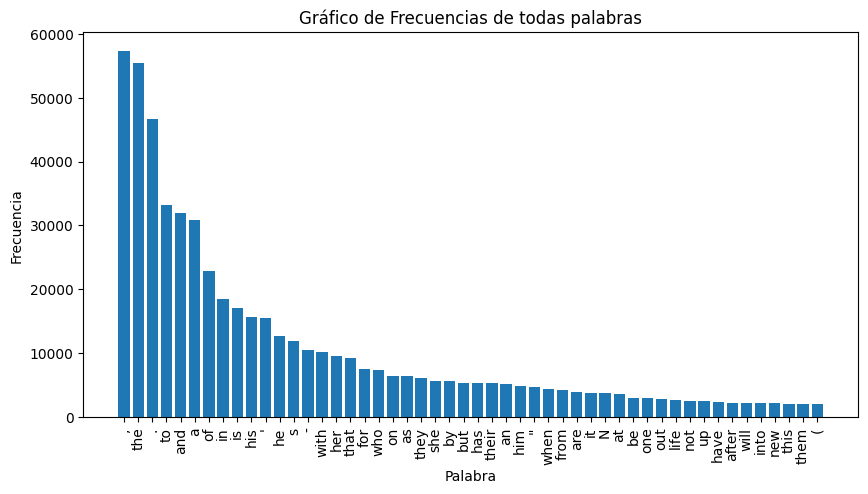

In [23]:
p_data = dataTraining['plot'].tolist()

# Combina todos los textos en un solo gran texto
corpus = ' '.join(p_data)

# Tokeniza
tokens = corpus.split()

# Calcula la frecuencia de las palabras sin preprocesar
word_frequency = Counter(tokens)

# Ordena las palabras por frecuencia en orden descendente
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True))

# Obtén las palabras y sus frecuencias ordenadas
words = list(sorted_word_frequency.keys())
frequencies = list(sorted_word_frequency.values())

# gráfico de barras de frecuencias
plt.figure(figsize=(10, 5))
plt.bar(words[:50], frequencies[:50])
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencias de todas palabras')
plt.xticks(rotation=90)
plt.show()

In [24]:
def quitar(text):
  text = str(text)
  text = ''.join([word for word in text if word not in string.punctuation])
  return text

def cantidad_gen(vector):
  return len(vector)

# Tokenizar los géneros
genxpeli = pd.DataFrame(dataTraining['genres'].apply(lambda x: [word.lower() for word in x])) # Mostrar el DataFrame con géneros tokenizados
genxpeli = genxpeli['genres'].apply(quitar)
genxpeli = genxpeli.apply(word_tokenize)
genxpeli = genxpeli.apply(cantidad_gen)

#Estadisticas basicas
print(f'El promedio de generos por pelicula es: {genxpeli.mean()}')
print(f'El máximo de generos por pelicula es: {genxpeli.max()}')
print(f'El mínimo de generos por pelicula es: {genxpeli.min()}')

El promedio de generos por pelicula es: 2.7328689043698544
El máximo de generos por pelicula es: 9
El mínimo de generos por pelicula es: 1


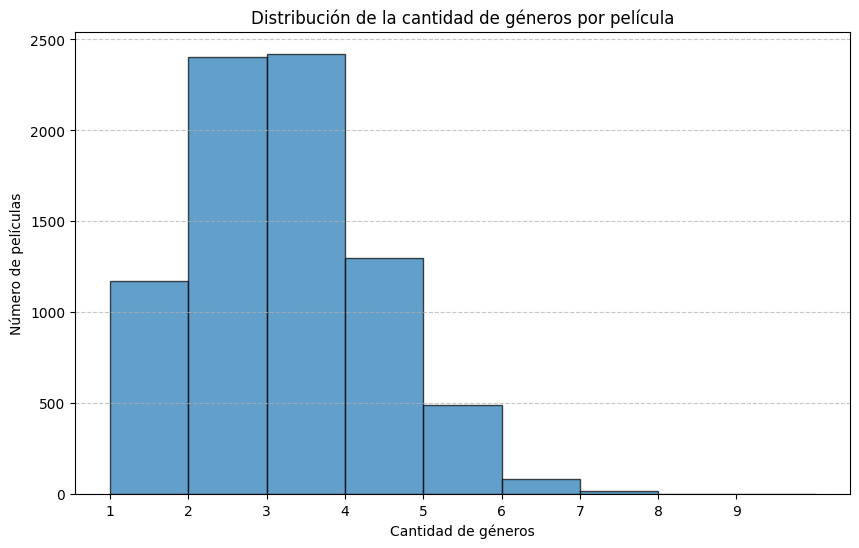

In [25]:
# Graficar la distribución de géneros por película
plt.figure(figsize=(10, 6))
plt.hist(genxpeli, bins=range(genxpeli.min(), genxpeli.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Distribución de la cantidad de géneros por película')
plt.xlabel('Cantidad de géneros')
plt.ylabel('Número de películas')
plt.xticks(range(genxpeli.min(), genxpeli.max() + 1))  # Para mostrar los valores enteros en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
genxpeli=pd.DataFrame(genxpeli)
genxpeli

,genres
3107,2
900,3
6724,3
4704,1
2582,3
...,...
8417,2
1592,3
1723,5
7605,6


genres
3    2419
2    2405
4    1300
1    1172
5     489
6      85
7      20
8       3
9       2
Name: count, dtype: int64


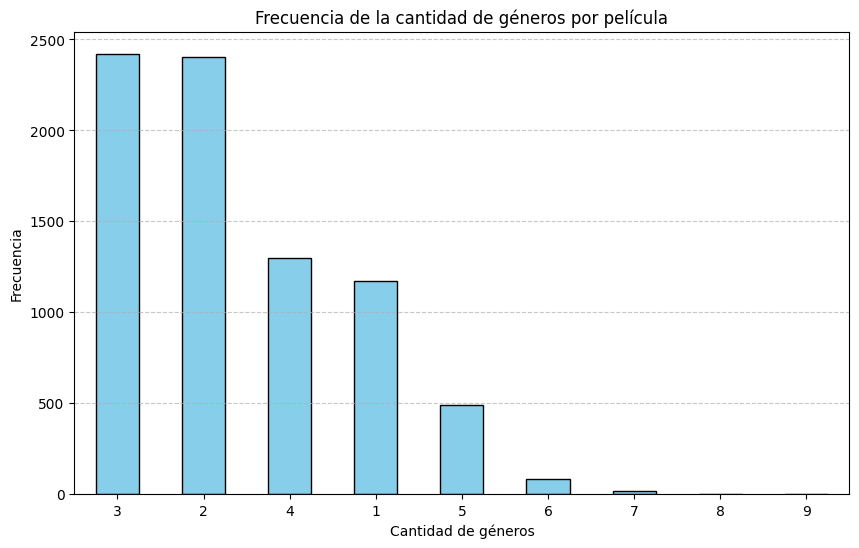

In [27]:
# Calcular las frecuencias de las categorías
frecuencias = genxpeli['genres'].value_counts()

# Mostrar las frecuencias
print(frecuencias)

# Graficar las frecuencias en un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de la cantidad de géneros por película')
plt.xlabel('Cantidad de géneros')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

Pre procesamiento de texto

In [28]:
#Revisión de datos nulos
pd.DataFrame(dataTraining.isnull().sum(), columns=['Cantidad de nulos'])

,Cantidad de nulos
year,0
title,0
plot,0
genres,0
rating,0


Se va realizar ejemplo del pre-procesamiento que se le va realizar a la data

Se va a combinar el titulo y la reseña

In [29]:
# Combinar las columnas 'plot' y 'title' en una nueva columna llamada 'combined'
dataTraining['combined'] = dataTraining['title'] + ' ' + dataTraining['plot']

In [30]:
dataTraining.head()

,year,title,plot,genres,rating,combined
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0,Most most is the story of a single father who ...
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6,How to Be a Serial Killer a serial killer deci...
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2,"A Woman's Face in sweden , a female blackmail..."
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4,Executive Suite in a friday afternoon in new y...
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6,"Narrow Margin in los angeles , the editor of ..."


Se extrae un ejemplo

In [31]:
#Tomar una película de ejemplo
ejemplo = dataTraining['combined'][0]
ejemplo

"Major Payne major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

Se pasa todo a minuscula

In [32]:
ejemplo = ejemplo.lower()
ejemplo

"major payne major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

Eliminar toda la puntuación

In [33]:
ejemplo = ''.join([word for word in ejemplo if word not in string.punctuation])
ejemplo

'major payne major benson winifred payne is being discharged from the marines   payne is a killin   machine   but the wars of the world are no longer fought on the battlefield   a career marine   he has no idea what to do as a civilian   so his commander finds him a job    commanding officer of a local school  s jrotc program   a bunch or ragtag losers with no hope   using such teaching tools as live grenades and real bullets   payne starts to instill the corp with some hope   but when payne is recalled to fight in bosnia   will he leave the corp that has just started to believe in him   or will he find out that killin   ain  t much of a livin   '

Eliminar caracteres especiales o números

In [34]:
ejemplo = ''.join([char for char in ejemplo if char.isalpha() or char.isspace()])
ejemplo

'major payne major benson winifred payne is being discharged from the marines   payne is a killin   machine   but the wars of the world are no longer fought on the battlefield   a career marine   he has no idea what to do as a civilian   so his commander finds him a job    commanding officer of a local school  s jrotc program   a bunch or ragtag losers with no hope   using such teaching tools as live grenades and real bullets   payne starts to instill the corp with some hope   but when payne is recalled to fight in bosnia   will he leave the corp that has just started to believe in him   or will he find out that killin   ain  t much of a livin   '

Eliminar espacios extra

In [35]:
ejemplo = ' '.join(ejemplo.split())
ejemplo

'major payne major benson winifred payne is being discharged from the marines payne is a killin machine but the wars of the world are no longer fought on the battlefield a career marine he has no idea what to do as a civilian so his commander finds him a job commanding officer of a local school s jrotc program a bunch or ragtag losers with no hope using such teaching tools as live grenades and real bullets payne starts to instill the corp with some hope but when payne is recalled to fight in bosnia will he leave the corp that has just started to believe in him or will he find out that killin ain t much of a livin'

Tokenizacion

In [36]:
ejemplo = word_tokenize(ejemplo)
ejemplo

['major',
 'payne',
 'major',
 'benson',
 'winifred',
 'payne',
 'is',
 'being',
 'discharged',
 'from',
 'the',
 'marines',
 'payne',
 'is',
 'a',
 'killin',
 'machine',
 'but',
 'the',
 'wars',
 'of',
 'the',
 'world',
 'are',
 'no',
 'longer',
 'fought',
 'on',
 'the',
 'battlefield',
 'a',
 'career',
 'marine',
 'he',
 'has',
 'no',
 'idea',
 'what',
 'to',
 'do',
 'as',
 'a',
 'civilian',
 'so',
 'his',
 'commander',
 'finds',
 'him',
 'a',
 'job',
 'commanding',
 'officer',
 'of',
 'a',
 'local',
 'school',
 's',
 'jrotc',
 'program',
 'a',
 'bunch',
 'or',
 'ragtag',
 'losers',
 'with',
 'no',
 'hope',
 'using',
 'such',
 'teaching',
 'tools',
 'as',
 'live',
 'grenades',
 'and',
 'real',
 'bullets',
 'payne',
 'starts',
 'to',
 'instill',
 'the',
 'corp',
 'with',
 'some',
 'hope',
 'but',
 'when',
 'payne',
 'is',
 'recalled',
 'to',
 'fight',
 'in',
 'bosnia',
 'will',
 'he',
 'leave',
 'the',
 'corp',
 'that',
 'has',
 'just',
 'started',
 'to',
 'believe',
 'in',
 'him',
 '

Eliminar stopwords

In [37]:
stop_words = set(stopwords.words('english')) #Stopwords
ejemplo = [word for word in ejemplo if word not in stop_words] #quitando stopwords
ejemplo

['major',
 'payne',
 'major',
 'benson',
 'winifred',
 'payne',
 'discharged',
 'marines',
 'payne',
 'killin',
 'machine',
 'wars',
 'world',
 'longer',
 'fought',
 'battlefield',
 'career',
 'marine',
 'idea',
 'civilian',
 'commander',
 'finds',
 'job',
 'commanding',
 'officer',
 'local',
 'school',
 'jrotc',
 'program',
 'bunch',
 'ragtag',
 'losers',
 'hope',
 'using',
 'teaching',
 'tools',
 'live',
 'grenades',
 'real',
 'bullets',
 'payne',
 'starts',
 'instill',
 'corp',
 'hope',
 'payne',
 'recalled',
 'fight',
 'bosnia',
 'leave',
 'corp',
 'started',
 'believe',
 'find',
 'killin',
 'much',
 'livin']

Lematizacion

In [38]:
wordnet_lemmatizer = WordNetLemmatizer() #Lematizador
ejemplo = [wordnet_lemmatizer.lemmatize(word) for word in ejemplo] #devuelve palabras lematizadas
ejemplo

['major',
 'payne',
 'major',
 'benson',
 'winifred',
 'payne',
 'discharged',
 'marine',
 'payne',
 'killin',
 'machine',
 'war',
 'world',
 'longer',
 'fought',
 'battlefield',
 'career',
 'marine',
 'idea',
 'civilian',
 'commander',
 'find',
 'job',
 'commanding',
 'officer',
 'local',
 'school',
 'jrotc',
 'program',
 'bunch',
 'ragtag',
 'loser',
 'hope',
 'using',
 'teaching',
 'tool',
 'live',
 'grenade',
 'real',
 'bullet',
 'payne',
 'start',
 'instill',
 'corp',
 'hope',
 'payne',
 'recalled',
 'fight',
 'bosnia',
 'leave',
 'corp',
 'started',
 'believe',
 'find',
 'killin',
 'much',
 'livin']

Se vuelve a unir las palabras para obtener el texto transformado

In [39]:
' '.join(ejemplo)

'major payne major benson winifred payne discharged marine payne killin machine war world longer fought battlefield career marine idea civilian commander find job commanding officer local school jrotc program bunch ragtag loser hope using teaching tool live grenade real bullet payne start instill corp hope payne recalled fight bosnia leave corp started believe find killin much livin'

Función de preprocesamiento de la data

In [40]:
stop_words = set(stopwords.words('english')) #Stopwords
wordnet_lemmatizer = WordNetLemmatizer() #Lematizador
def preprocess(text):
    text = text.lower() #eliminar mayusculas
    text = ''.join([word for word in text if word not in string.punctuation]) #quitar puntuación
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    text = ' '.join(text.split())
    tokens = word_tokenize(text) #tokenizando
    tokens = [word for word in tokens if word not in stop_words] #quitando stopwords
    lemas = [wordnet_lemmatizer.lemmatize(word) for word in tokens] #devuelve palabras lematizadas
    return ' '.join(lemas)

data_modificada = dataTraining['combined'].apply(preprocess)

In [41]:
data_modificada.head()

,combined
3107,story single father take eight year old son wo...
900,serial killer serial killer decides teach secr...
6724,woman face sweden female blackmailer disfiguri...
4704,executive suite friday afternoon new york pres...
2582,narrow margin los angeles editor publishing ho...


Análisis de la data post limpieza

Palabras mas frecuentes post-limpieza

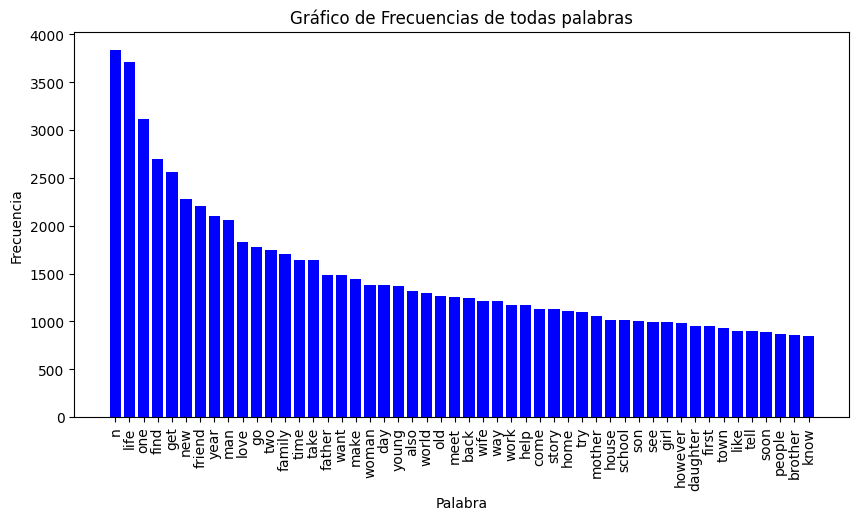

In [42]:
p_data = data_modificada.tolist()

# Combina todos los textos en un solo gran texto
corpus = ' '.join(p_data)

# Tokeniza
tokens = corpus.split()

# Calcula la frecuencia de las palabras sin preprocesar
word_frequency = Counter(tokens)

# Ordena las palabras por frecuencia en orden descendente
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True))

# Obtén las palabras y sus frecuencias ordenadas
words = list(sorted_word_frequency.keys())
frequencies = list(sorted_word_frequency.values())

# gráfico de barras de frecuencias
plt.figure(figsize=(10, 5))
plt.bar(words[:50], frequencies[:50], color='blue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencias de todas palabras')
plt.xticks(rotation=90)
plt.show()

In [43]:
model_es = spacy.load("en_core_web_sm")
peliculas = " ".join(data_modificada.tolist())
peliculas = peliculas[:999999]
doc = model_es(peliculas)
discursos_not_stop = [str(token) for token in doc]

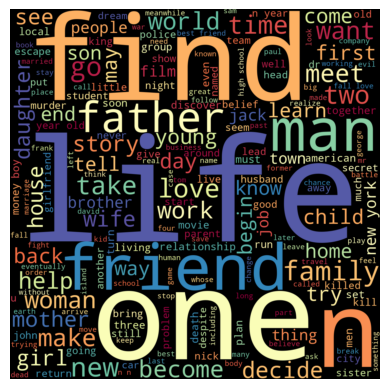

In [44]:
wc = wordcloud.WordCloud(width=1500, height=1500, colormap="Spectral")
wc.generate(" ".join(discursos_not_stop))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

MODELOS SIN PROCESAMIENTO DE DATOS

BAG OF WORDS

In [45]:
vect = CountVectorizer(ngram_range=(1,3), max_features=5000)
X_dtm = vect.fit_transform(dataTraining['plot'])
features = vect.vocabulary_.keys()
X_dtm.shape

(7895, 5000)

In [46]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

In [47]:
#ESTANDARIZACIÓN
#scaler = StandardScaler(with_mean=False)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [48]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [49]:
y_pred_genres = log_reg_model.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8233510150376094

In [50]:
# Crear el modelo de Random Forest
rf_model_1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))

# Entrenar el modelo con los datos de entrenamiento
rf_model_1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [51]:
y_pred_genres = rf_model_1.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7968820016712849

In [52]:
# Crear y entrenar el modelo XGBoost
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [53]:
y_pred_genres = xgb_model.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8243011776805146

TFIDF

In [54]:
vect = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X_dtm = vect.fit_transform(dataTraining['plot'])
features = vect.vocabulary_.keys()
X_dtm.shape

(7895, 5000)

In [55]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

In [56]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [57]:
y_pred_genres = log_reg_model.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8646374421419784

In [58]:
# Crear el modelo de Random Forest
rf_model_1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))

# Entrenar el modelo con los datos de entrenamiento
rf_model_1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [59]:
y_pred_genres = rf_model_1.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.802285984592166

In [60]:
# Crear y entrenar el modelo XGBoost
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [61]:
y_pred_genres = xgb_model.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8113232310177424

WORD2VEC

In [62]:
#Word2Vec
model = Word2Vec(dataTraining['plot'], vector_size=32, window=20, negative=50, min_count=3, workers=4)

In [63]:
# Función para obtener el vector promedio de un documento
def document_vector(doc, model):
    # Filtrar palabras que están en el vocabulario de Word2Vec
    doc = [word for word in doc if word in model.wv.key_to_index]

    # Si el documento tiene palabras conocidas
    if len(doc) > 0:
        return np.mean(model.wv[doc], axis=0)
    else:
        # Si no hay palabras conocidas, retornar un vector de ceros
        return np.zeros(model.vector_size)

# Obtener los vectores promedio de cada documento
X_word2vec = np.array([document_vector(doc, model) for doc in dataTraining['plot']])

In [64]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

In [65]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [66]:
y_pred_genres = log_reg_model.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8646374421419784

In [67]:
# Crear el modelo de Random Forest
rf_model_1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))

# Entrenar el modelo con los datos de entrenamiento
rf_model_1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [68]:
y_pred_genres = rf_model_1.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.802285984592166

In [69]:
# Crear y entrenar el modelo XGBoost
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [70]:
y_pred_genres = xgb_model.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8113232310177424

GLOVE

In [71]:
# Descargar los embeddings de GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-10-04 16:47:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-04 16:47:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-04 16:47:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [72]:
# Cargar los embeddings preentrenados (usa glove.6B.100d.txt para vectores de 100 dimensiones, por ejemplo)
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Cargar los embeddings de GloVe con 100 dimensiones
glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

In [73]:
# Función para obtener el embedding promedio de un documento
def document_embedding(doc, embeddings):
    # Filtrar palabras que están en los embeddings de GloVe
    doc = [word for word in doc if word in embeddings]

    # Si el documento tiene palabras conocidas
    if len(doc) > 0:
        return np.mean([embeddings[word] for word in doc], axis=0)
    else:
        # Si no hay palabras conocidas, retornar un vector de ceros
        return np.zeros(100)  # 100 si usas los embeddings de GloVe de 100 dimensiones

# Obtener los embeddings promedio de cada documento
X_embeddings = np.array([document_embedding(doc, glove_embeddings) for doc in dataTraining['plot']])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y_genres, test_size=0.2, random_state=0)

In [74]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model_4 = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model_4.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [75]:
y_pred_genres = log_reg_model_4.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.6124709505655527

In [76]:
# Crear y entrenar el modelo de Random Forest
rf_model_4 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))
rf_model_4.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [77]:
y_pred_genres = rf_model_4.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5588794439341246

In [78]:
# Entrenar XGBoost
xgb_model_4 = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))
xgb_model_4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [79]:
y_pred_genres = xgb_model_4.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.6001217611419629

Partición de la data en train y test

In [80]:
#Bag Of Words
vect = CountVectorizer(ngram_range=(1,3), max_features=5000)#, min_df=3) #hiperparametro los ngramas
X_dtm = vect.fit_transform(data_modificada)

X_dtm.shape

(7895, 5000)

In [81]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

In [82]:
print(X_train.shape)
print(X_test.shape)

(6316, 5000)
(1579, 5000)


In [83]:
#ESTANDARIZACIÓN
#scaler = StandardScaler(with_mean=False)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

PRIMER MODELO

In [84]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [85]:
y_pred_genres = log_reg_model.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8537820015498315

In [86]:
# Crear el modelo de Random Forest
rf_model_1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))

# Entrenar el modelo con los datos de entrenamiento
rf_model_1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [87]:
y_pred_genres = rf_model_1.predict_proba(X_test)

In [88]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8256841179582791

In [89]:
# Crear y entrenar el modelo XGBoost
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [90]:
y_pred_genres = xgb_model.predict_proba(X_test)

In [91]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.851594030989996

SEGUNDO MODELO

In [92]:
#TFIDF
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)#, min_df=3) #hiperparametro los ngramas
X_dtm_2 = tfidf.fit_transform(data_modificada).toarray()

X_dtm_2.shape

(7895, 5000)

In [93]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm_2, y_genres, test_size=0.2, random_state=0)

In [94]:
#ESTANDARIZACIÓN
#scaler = StandardScaler(with_mean=False)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [95]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model_2 = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model_2.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [96]:
y_pred_genres = log_reg_model_2.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8959041285324941

In [97]:
# Crear el modelo de Random Forest
rf_model_2 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))

# Entrenar el modelo con los datos de entrenamiento
rf_model_2.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [98]:
y_pred_genres = rf_model_2.predict_proba(X_test)

In [99]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8156480070112148

In [100]:
# Crear y entrenar el modelo XGBoost
xgb_model_2 = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model_2.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:53:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [101]:
y_pred_genres = xgb_model_2.predict_proba(X_test)

In [102]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8463441991376581

TERCER MODELO

In [103]:
#Word2Vec
model = Word2Vec(data_modificada, vector_size=32, window=20, negative=50, min_count=3, workers=4)

In [104]:
# Función para obtener el vector promedio de un documento
def document_vector(doc, model):
    # Filtrar palabras que están en el vocabulario de Word2Vec
    doc = [word for word in doc if word in model.wv.key_to_index]

    # Si el documento tiene palabras conocidas
    if len(doc) > 0:
        return np.mean(model.wv[doc], axis=0)
    else:
        # Si no hay palabras conocidas, retornar un vector de ceros
        return np.zeros(model.vector_size)

# Obtener los vectores promedio de cada documento
X_word2vec = np.array([document_vector(doc, model) for doc in data_modificada])

In [105]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y_genres, test_size=0.2, random_state=0)

In [106]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model_3 = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model_3.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [107]:
y_pred_genres = log_reg_model_3.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.618231449129346

In [108]:
# Crear y entrenar el modelo de Random Forest
rf_model_3 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))
rf_model_3.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [109]:
y_pred_genres = rf_model_3.predict_proba(X_test)

In [110]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5679297987554306

In [111]:
# Crear y entrenar el modelo XGBoost
xgb_model_3 = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))

# Entrenar el modelo
xgb_model_3.fit(X_train, y_train_genres)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [112]:
y_pred_genres = xgb_model_3.predict_proba(X_test)

In [113]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5989762599226455

CUARTO MODELO EMBEDDINGS GLOVE

In [114]:
# Función para obtener el embedding promedio de un documento
def document_embedding(doc, embeddings):
    # Filtrar palabras que están en los embeddings de GloVe
    doc = [word for word in doc if word in embeddings]

    # Si el documento tiene palabras conocidas
    if len(doc) > 0:
        return np.mean([embeddings[word] for word in doc], axis=0)
    else:
        # Si no hay palabras conocidas, retornar un vector de ceros
        return np.zeros(100)  # 100 si usas los embeddings de GloVe de 100 dimensiones

# Obtener los embeddings promedio de cada documento
X_embeddings = np.array([document_embedding(doc, glove_embeddings) for doc in data_modificada])

In [115]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y_genres, test_size=0.2, random_state=0)

In [116]:
# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model_4 = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model_4.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=0))

In [117]:
y_pred_genres = log_reg_model_4.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.6219869444388039

In [118]:
# Crear y entrenar el modelo de Random Forest
rf_model_4 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=0))
rf_model_4.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [119]:
y_pred_genres = rf_model_4.predict_proba(X_test)

In [120]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5724681205423465

In [121]:
# Entrenar XGBoost
xgb_model_4 = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=0))
xgb_model_4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...))

In [122]:
y_pred_genres = xgb_model_4.predict_proba(X_test)

In [123]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5947345680802492

PCA para mejorar la metrica del mejor modelo

In [124]:
from sklearn.decomposition import PCA

#Bag Of Words
vect = CountVectorizer(ngram_range=(1,3), max_features=5000)#, min_df=3) #hiperparametro los ngramas
X_dtm = vect.fit_transform(data_modificada)

X_dtm.shape

X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

# Aplicar PCA para reducir a 100 componentes
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Ver la varianza explicada por los primeros 100 componentes
print(f"Varianza explicada: {sum(pca.explained_variance_ratio_):.2f}")

# Crear el modelo de regresión logística con One-vs-Rest
log_reg_model_5 = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))

# Entrenar el modelo
log_reg_model_5.fit(X_train, y_train_genres)

y_pred_genres = log_reg_model_5.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

Varianza explicada: 0.29


0.8537820015498315

BUSCA DE HIPERPARAMETROS CON OPTUNA

In [125]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [126]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import xgboost as xgb

In [127]:
#TFIDF
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)#, min_df=3) #hiperparametro los ngramas
X_dtm_2 = tfidf.fit_transform(data_modificada).toarray()

X_dtm_2.shape

X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.2, random_state=0)

In [128]:
# Definir la función objetivo para la optimización
def objective(trial):
    # Hiperparámetros a optimizar
    C = trial.suggest_loguniform('C', 1e-5, 1e2)  # Hiperparámetro de regularización
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])  # Regularización L1 o L2

    # Elegir el solucionador basado en el tipo de penalización
    if penalty == 'l1':
        solver = 'liblinear'  # L1 solo es compatible con 'liblinear' y 'saga'
    else:
        solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])  # L2 es compatible con 'lbfgs' y 'saga'

    max_iter = trial.suggest_int('max_iter', 100, 1000)  # Iteraciones máximas

    # Crear y entrenar el modelo
    log_reg_model = OneVsRestClassifier(
        LogisticRegression(C=C, solver=solver, max_iter=max_iter, penalty=penalty, random_state=0)
    )
    log_reg_model.fit(X_train, y_train_genres)

    # Hacer predicciones
    y_pred_probs = log_reg_model.predict_proba(X_test)

    # Calcular el AUC
    auc = roc_auc_score(y_test_genres, y_pred_probs, average='macro', multi_class='ovr')

    return auc

# Crear un estudio de Optuna y optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Número de pruebas

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)
print("Mejor AUC:", study.best_value)

[I 2024-10-04 16:58:12,192] A new study created in memory with name: no-name-95305171-eff2-4c83-8fb5-174cd333f008
<ipython-input-128-e2286ebaaa53>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)  # Hiperparámetro de regularización
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packag

Mejores hiperparámetros: {'C': 0.020585303658787035, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 912}
Mejor AUC: 0.879115650442054


In [129]:
# Crear y entrenar el modelo
final_model = OneVsRestClassifier(LogisticRegression(C=0.021785489127569693, solver='lbfgs', max_iter=546, penalty='l2', random_state=0))
final_model.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LogisticRegression(C=0.021785489127569693,
                                                 max_iter=546, random_state=0))

In [130]:
y_pred_genres = final_model.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8791237530149849

TFIDF con Embeddings

In [131]:
nltk.download('punkt')
nltk.download('stopwords')

# 1. Preprocesamiento de textos
stop_words = set(stopwords.words('english')) #Stopwords
wordnet_lemmatizer = WordNetLemmatizer() #Lematizador

data_modificada = dataTraining['combined'].apply(preprocess)

# 2. Entrenar el modelo Word2Vec
w2v_model = Word2Vec(sentences=dataTraining['combined'], vector_size=100, window=5, min_count=1, workers=4)

# 3. Calcular la matriz TF-IDF
tfidf = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
tfidf_matrix = tfidf.fit_transform(dataTraining['combined'])
tfidf_feature_names = tfidf.get_feature_names_out()

# 4. Ponderar los embeddings de Word2Vec con TF-IDF
def weighted_document_embedding(doc, model, tfidf_vectorizer, tfidf_matrix, idx):
    words = [word for word in doc if word in model.wv.key_to_index]
    tfidf_scores = tfidf_matrix[idx, :]
    tfidf_weights = np.array([tfidf_scores[0, tfidf_vectorizer.vocabulary_[word]] if word in tfidf_vectorizer.vocabulary_ else 0 for word in words])
    word_embeddings = np.array([model.wv[word] for word in words])
    if len(word_embeddings) > 0:
        return np.average(word_embeddings, axis=0, weights=tfidf_weights)
    else:
        return np.zeros(model.vector_size)

# 5. Obtener los embeddings ponderados para todos los documentos
X_embeddings = np.array([weighted_document_embedding(doc, w2v_model, tfidf, tfidf_matrix, idx) for idx, doc in enumerate(dataTraining['combined'])])

# 6. Preparar las etiquetas para la clasificación
le = MultiLabelBinarizer()
y = le.fit_transform(dataTraining['genres'])

# 7. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=0)

# 8. Entrenar el modelo de regresión logística con One-vs-Rest
# Crear y entrenar el modelo
final_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=0))
final_model.fit(X_train, y_train)

# 9. Predecir con el modelo
y_pred_genres = final_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_genres, average='macro')

# 10. Evaluar el modelo
roc_auc_score(y_test, y_pred_genres, average='macro')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.6145086599823125